In [1]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
%load_ext autotime

In [2]:
sam = sam_model_registry["default"](checkpoint="./sam_vit_h_4b8939.pth")

In [3]:
predictor = SamPredictor(sam)
maksGenerator = SamAutomaticMaskGenerator(sam)

In [4]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_anns(anns, ax):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
imPath = "ZenithShelf0.jpg"
im = cv2.imread(imPath)
im = cv2.resize(im, (int(im.shape[1] * 0.8), int(im.shape[0] * 0.8)), interpolation=cv2.INTER_AREA)

In [6]:
masks = maksGenerator.generate(im)

In [7]:
B, G, R = cv2.split(im)
reduced_B = B * 0.4  # Reducing Blue component by 60%
reduced_red_image = cv2.merge([reduced_B.astype(np.uint8), G, R])

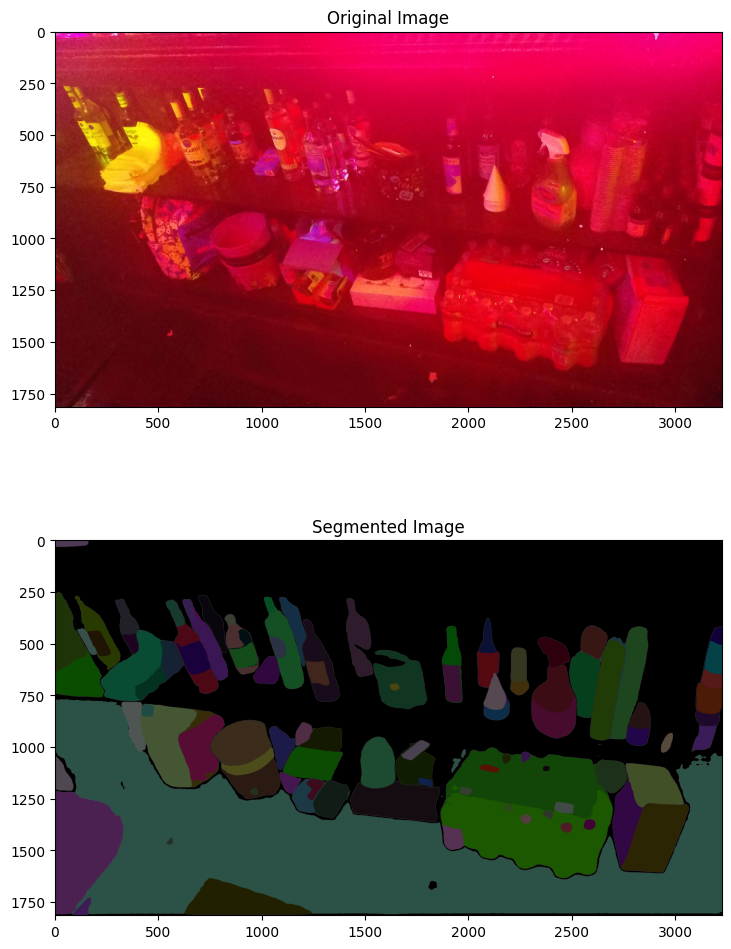

In [8]:
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[0].set_title("Original Image")
black_image = np.zeros((im.shape[0], im.shape[1], 3), dtype=np.uint8)
axes[1].imshow(black_image)
axes[1].set_title("Segmented Image")
show_anns(masks, axes[1])
plt.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.savefig("foo3.png")

In [10]:
len(masks)

111